Cargando datos analizados...
Dataset cargado: 140 reseñas
Top palabras cargado: 50 palabras

1. NUBE DE PALABRAS (WORDCLOUD)
Generando WordCloud...


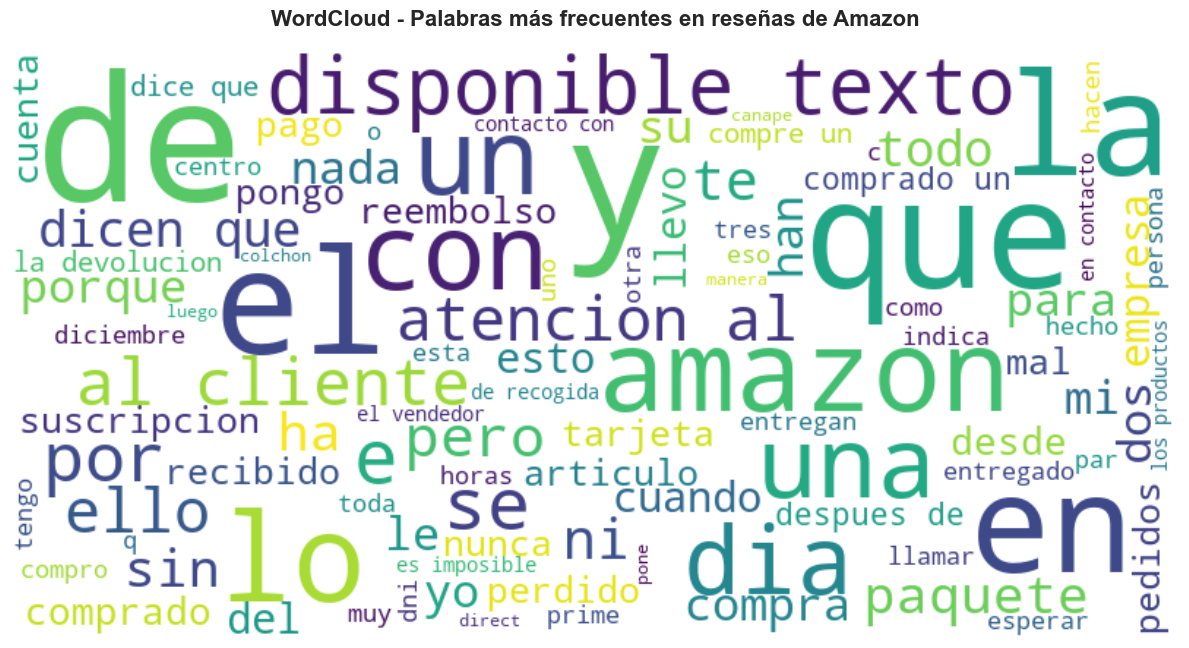

✓ WordCloud guardado en: ../visualizations/wordcloud.png

2. GRÁFICO DE BARRAS - Top 10 Palabras más Frecuentes


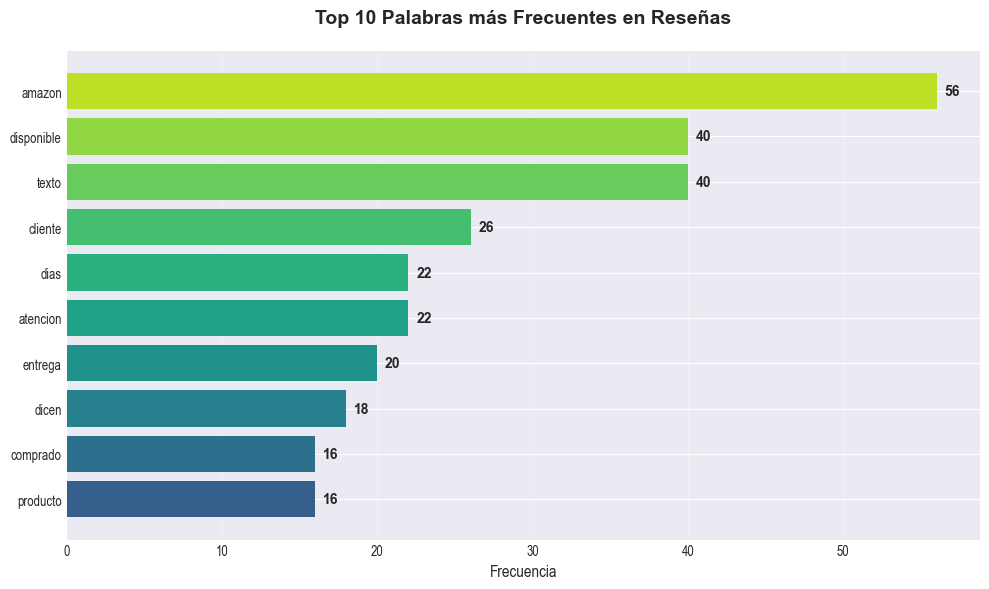

✓ Gráfico de barras guardado en: ../visualizations/top10_palabras.png

3. DISTRIBUCIÓN DE SENTIMIENTOS


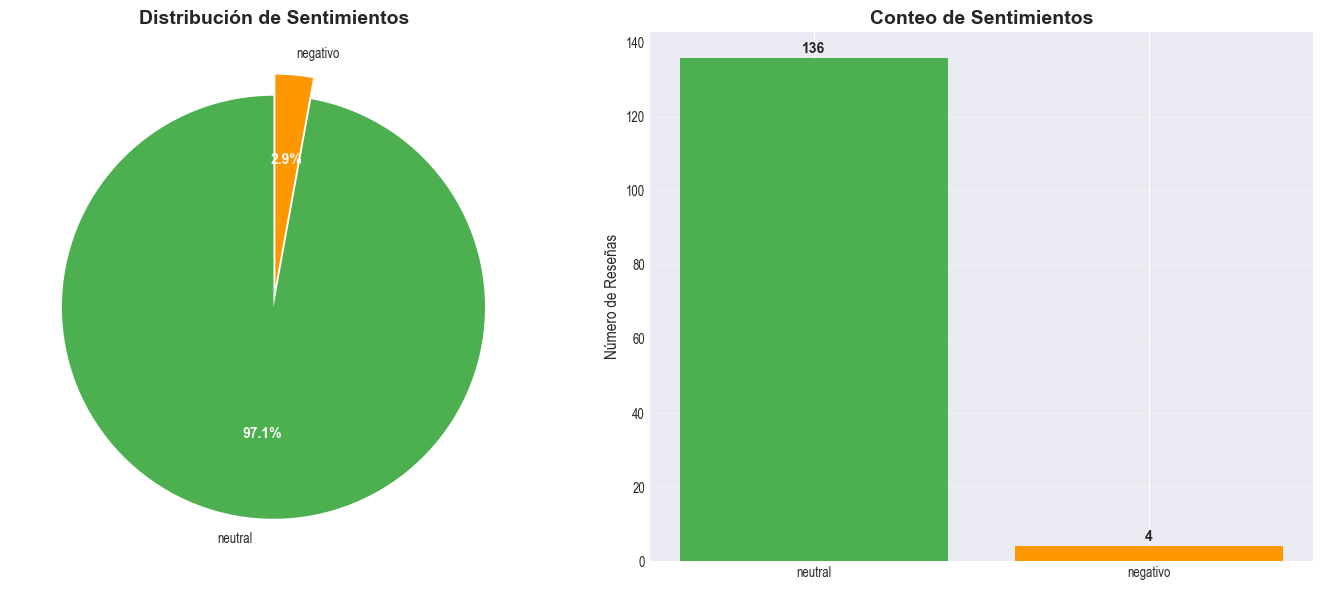

✓ Distribución de sentimientos guardada en: ../visualizations/distribucion_sentimientos.png

4. PUNTUACIÓN VS SENTIMIENTO


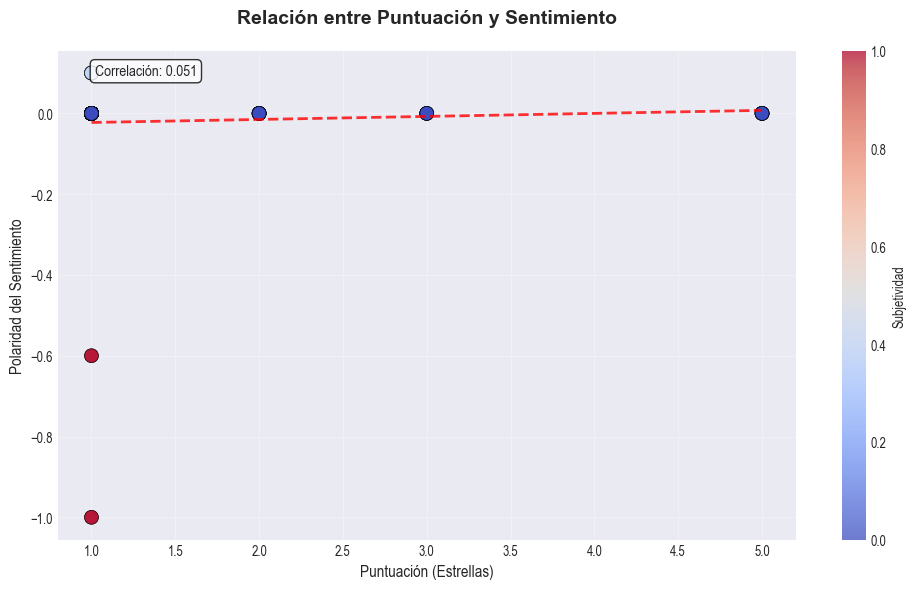

✓ Gráfico puntuación vs sentimiento guardado

5. GRÁFICOS ADICIONALES DE VALOR


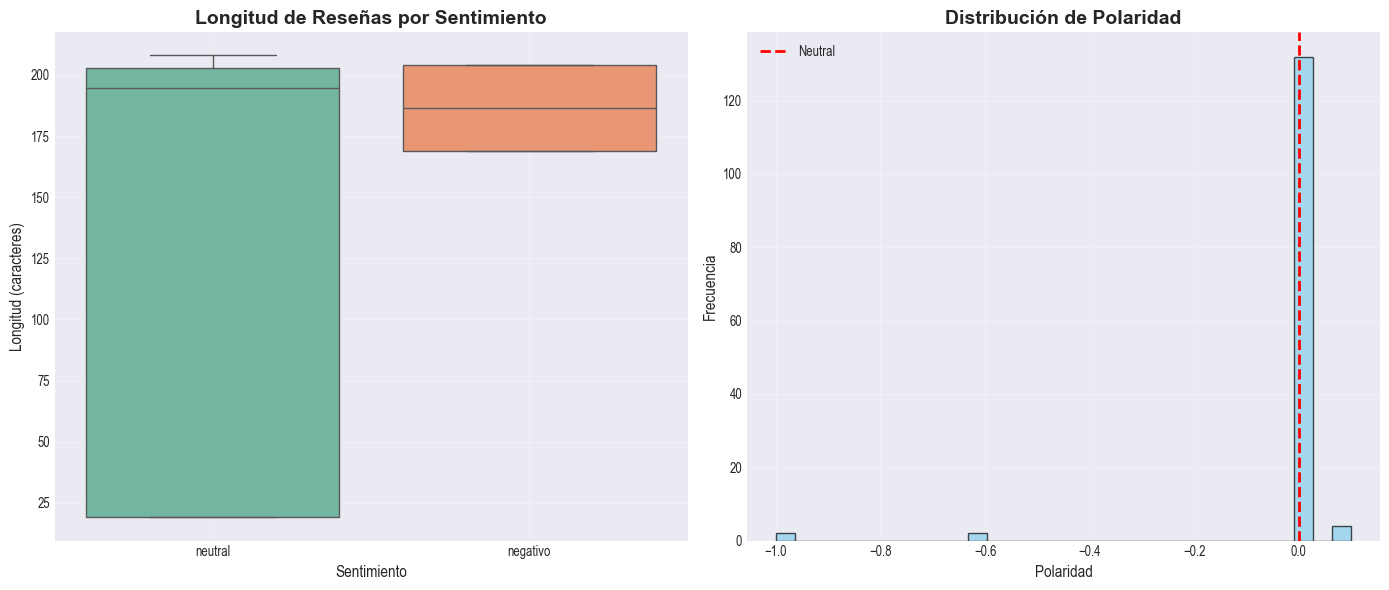


Generando Heatmap de palabras por sentimiento...


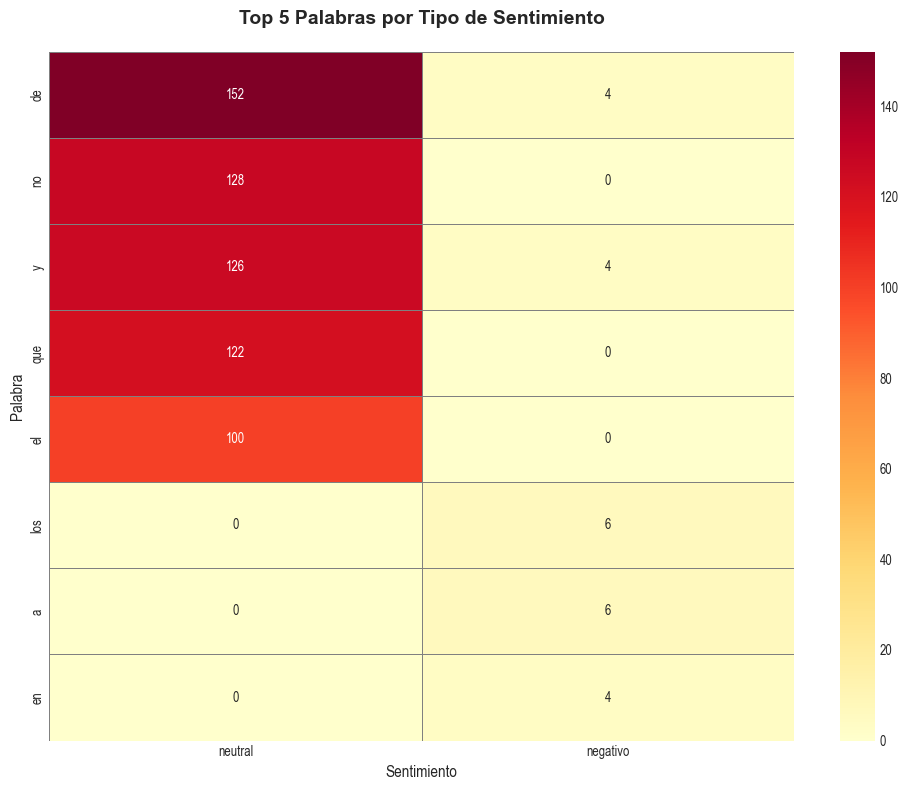


Generando gráfico de evolución temporal...


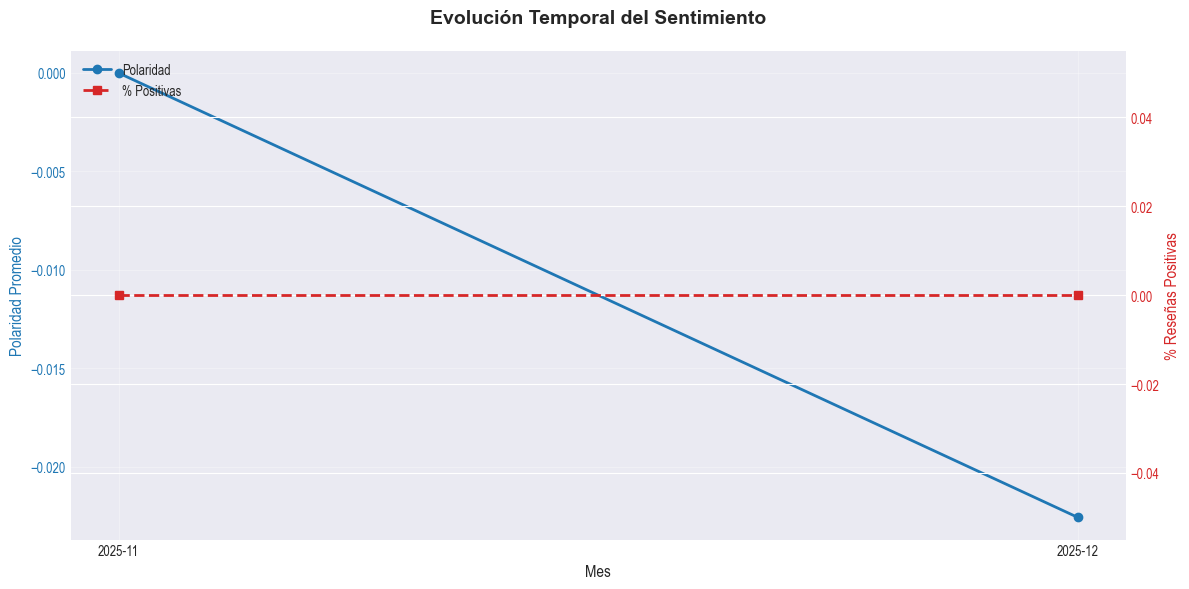


6. DASHBOARD INTERACTIVO CON PLOTLY


✓ Dashboard interactivo guardado en: ../visualizations/dashboard_interactivo.html

7. CREANDO INFORME VISUAL FINAL


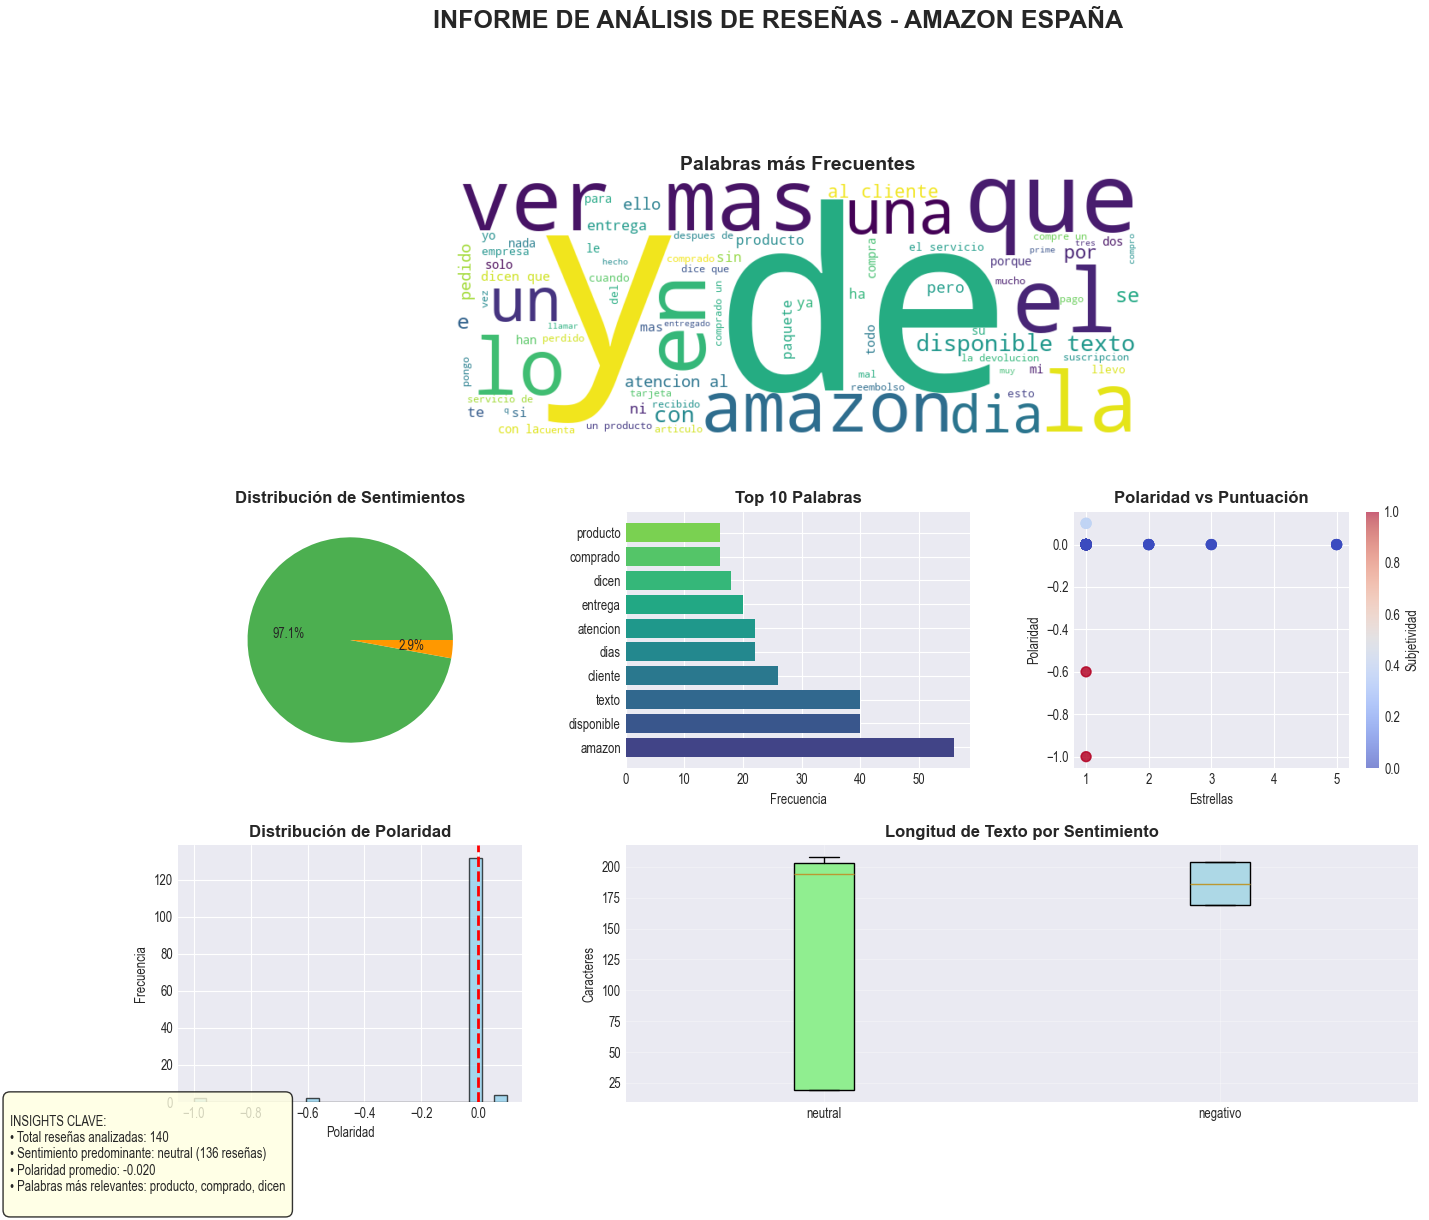

✓ Informe visual final guardado en: ../visualizations/informe_final.png

RESUMEN DE VISUALIZACIONES GENERADAS

📊 GRÁFICOS PRINCIPALES:
  1. wordcloud.png - Nube de palabras más frecuentes
  2. top10_palabras.png - Gráfico de barras top 10 palabras
  3. distribucion_sentimientos.png - Distribución de sentimientos
  4. puntuacion_vs_sentimiento.png - Relación puntuación-polaridad

📈 GRÁFICOS ADICIONALES:
  5. analisis_adicional_1.png - Longitud y distribución de polaridad
  6. heatmap_palabras_sentimiento.png - Heatmap de palabras por sentimiento
  7. informe_final.png - Informe visual completo

🖥️  INTERACTIVO:
  8. dashboard_interactivo.html - Dashboard interactivo (Plotly)

✅ Todas las visualizaciones están en la carpeta 'visualizations/'


In [1]:
# %% [markdown]
# # FASE 4: Visualización e Inteligencia de Negocio
# ## Persona B - Creación de Gráficos y Dashboard

# %%
# Instalación de dependencias
# !pip install wordcloud matplotlib seaborn plotly

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# %%
# Cargar datos con análisis de sentimiento
print("Cargando datos analizados...")
df = pd.read_csv('../data/processed/reviews_with_sentiment.csv')
print(f"Dataset cargado: {len(df)} reseñas")

# Cargar top palabras
top_words = pd.read_csv('../data/processed/top_palabras.csv')
print(f"Top palabras cargado: {len(top_words)} palabras")

# %%
# 1. WORDCLOUD (Nube de Palabras)
print("\n" + "="*60)
print("1. NUBE DE PALABRAS (WORDCLOUD)")
print("="*60)

# Combinar todos los textos limpios
text_all = ' '.join(df['texto_limpio'].dropna().astype(str))

# Configurar stopwords adicionales para el wordcloud
stopwords_es = set(STOPWORDS)
additional_stopwords = {
    'si', 'sí', 'no', 'ya', 'ver', 'vez', 'tan', 'así', 'solo',
    'sólo', 'aún', 'incluso', 'siempre', 'hace', 'hacer', 'puede',
    'cada', 'mas', 'más', 'menos', 'mucho', 'poco', 'gran', 'producto',
    'servicio', 'calidad', 'precio', 'tiempo', 'pedido', 'entrega'
}
stopwords_es.update(additional_stopwords)

# Crear wordcloud
print("Generando WordCloud...")
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=stopwords_es,
    max_words=100,
    contour_width=1,
    contour_color='steelblue',
    min_font_size=10,
    max_font_size=120,
    random_state=42
).generate(text_all)

# Visualizar wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Palabras más frecuentes en reseñas de Amazon', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../visualizations/wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ WordCloud guardado en: ../visualizations/wordcloud.png")

# %%
# 2. GRÁFICO DE BARRAS - Top 10 palabras
print("\n" + "="*60)
print("2. GRÁFICO DE BARRAS - Top 10 Palabras más Frecuentes")
print("="*60)

# Preparar datos para top 10 palabras
top_10_words = top_words.head(10).copy()
top_10_words = top_10_words.sort_values('frecuencia', ascending=True)

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_words['palabra'], top_10_words['frecuencia'], 
                color=plt.cm.viridis(np.linspace(0.3, 0.9, 10)))

# Añadir etiquetas de valor
for i, (value, bar) in enumerate(zip(top_10_words['frecuencia'], bars)):
    plt.text(value + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{value}', va='center', ha='left', fontweight='bold')

plt.xlabel('Frecuencia', fontsize=12)
plt.title('Top 10 Palabras más Frecuentes en Reseñas', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/top10_palabras.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Gráfico de barras guardado en: ../visualizations/top10_palabras.png")

# %%
# 3. DISTRIBUCIÓN DE SENTIMIENTOS
print("\n" + "="*60)
print("3. DISTRIBUCIÓN DE SENTIMIENTOS")
print("="*60)

# Gráfico de tarta - Distribución de sentimientos
sentiment_counts = df['sentiment'].value_counts()
colors = ['#4CAF50', '#FF9800', '#F44336']  # Verde, Naranja, Rojo

# Crear figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de tarta
wedges, texts, autotexts = axes[0].pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05] * len(sentiment_counts)
)
axes[0].set_title('Distribución de Sentimientos', fontsize=14, fontweight='bold')

# Mejorar etiquetas
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Gráfico de barras
bars = axes[1].bar(sentiment_counts.index, sentiment_counts.values, color=colors)
axes[1].set_title('Conteo de Sentimientos', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Número de Reseñas', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/distribucion_sentimientos.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Distribución de sentimientos guardada en: ../visualizations/distribucion_sentimientos.png")

# %%
# 4. ANÁLISIS DE PUNTUACIÓN VS SENTIMIENTO
print("\n" + "="*60)
print("4. PUNTUACIÓN VS SENTIMIENTO")
print("="*60)

if 'puntuacion' in df.columns and df['puntuacion'].notna().any():
    # Gráfico de dispersión con regresión
    plt.figure(figsize=(10, 6))
    
    # Crear scatter plot
    scatter = plt.scatter(df['puntuacion'], df['polarity'], 
                         c=df['subjectivity'], cmap='coolwarm',
                         alpha=0.7, s=100, edgecolors='black', linewidth=0.5)
    
    # Añadir línea de regresión
    z = np.polyfit(df['puntuacion'].dropna(), df['polarity'].dropna(), 1)
    p = np.poly1d(z)
    plt.plot(df['puntuacion'].dropna().sort_values(), 
             p(df['puntuacion'].dropna().sort_values()), 
             "r--", alpha=0.8, linewidth=2)
    
    plt.colorbar(scatter, label='Subjetividad')
    plt.xlabel('Puntuación (Estrellas)', fontsize=12)
    plt.ylabel('Polaridad del Sentimiento', fontsize=12)
    plt.title('Relación entre Puntuación y Sentimiento', 
              fontsize=14, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3)
    
    # Añadir anotación de correlación
    correlation = df[['puntuacion', 'polarity']].corr().iloc[0, 1]
    plt.annotate(f'Correlación: {correlation:.3f}', 
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=11, bbox=dict(boxstyle="round,pad=0.3", 
                                       facecolor="white", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('../visualizations/puntuacion_vs_sentimiento.png', 
                dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✓ Gráfico puntuación vs sentimiento guardado")

# %%
# 5. GRÁFICOS ADICIONALES DE VALOR
print("\n" + "="*60)
print("5. GRÁFICOS ADICIONALES DE VALOR")
print("="*60)

# 5.1 Distribución de longitud de reseñas por sentimiento
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot de longitud por sentimiento
df['longitud_texto'] = df['texto_limpio'].apply(len)
sns.boxplot(data=df, x='sentiment', y='longitud_texto', ax=axes[0], palette='Set2')
axes[0].set_title('Longitud de Reseñas por Sentimiento', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentimiento', fontsize=12)
axes[0].set_ylabel('Longitud (caracteres)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Histograma de polaridad
axes[1].hist(df['polarity'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Neutral')
axes[1].set_title('Distribución de Polaridad', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Polaridad', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/analisis_adicional_1.png', dpi=150, bbox_inches='tight')
plt.show()

# %%
# 5.2 Heatmap de palabras más frecuentes por sentimiento
print("\nGenerando Heatmap de palabras por sentimiento...")

# Crear DataFrame para heatmap
sentiments = df['sentiment'].unique()
heatmap_data = []

for sentiment in sentiments:
    # Filtrar textos por sentimiento
    sentiment_texts = df[df['sentiment'] == sentiment]['texto_limpio']
    all_words = ' '.join(sentiment_texts.dropna().astype(str)).split()
    
    # Contar frecuencia de palabras
    word_counter = Counter(all_words)
    
    # Tomar las 5 palabras más frecuentes
    top_words_sentiment = dict(word_counter.most_common(5))
    heatmap_data.append(top_words_sentiment)

# Crear DataFrame para el heatmap
heatmap_df = pd.DataFrame(heatmap_data, index=sentiments).T.fillna(0)

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, fmt='.0f', cmap='YlOrRd', 
            linewidths=0.5, linecolor='gray')
plt.title('Top 5 Palabras por Tipo de Sentimiento', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sentimiento', fontsize=12)
plt.ylabel('Palabra', fontsize=12)
plt.tight_layout()
plt.savefig('../visualizations/heatmap_palabras_sentimiento.png', 
            dpi=150, bbox_inches='tight')
plt.show()

# %%
# 5.3 Gráfico de evolución temporal (si hay fechas)
if 'fecha' in df.columns and df['fecha'].notna().any():
    print("\nGenerando gráfico de evolución temporal...")
    
    # Convertir fecha a datetime
    df['fecha_dt'] = pd.to_datetime(df['fecha'], errors='coerce')
    
    # Agrupar por mes y calcular polaridad promedio
    df['mes'] = df['fecha_dt'].dt.to_period('M')
    monthly_avg = df.groupby('mes').agg({
        'polarity': 'mean',
        'sentiment': lambda x: (x == 'positivo').mean() * 100
    }).reset_index()
    
    monthly_avg['mes'] = monthly_avg['mes'].astype(str)
    
    # Crear gráfico de líneas
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    color1 = 'tab:blue'
    ax1.set_xlabel('Mes', fontsize=12)
    ax1.set_ylabel('Polaridad Promedio', color=color1, fontsize=12)
    line1 = ax1.plot(monthly_avg['mes'], monthly_avg['polarity'], 
                     color=color1, marker='o', linewidth=2, label='Polaridad')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(True, alpha=0.3)
    
    # Segundo eje y
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('% Reseñas Positivas', color=color2, fontsize=12)
    line2 = ax2.plot(monthly_avg['mes'], monthly_avg['sentiment'], 
                     color=color2, marker='s', linewidth=2, linestyle='--', 
                     label='% Positivas')
    ax2.tick_params(axis='y', labelcolor=color2)
    
    # Añadir título y leyenda
    plt.title('Evolución Temporal del Sentimiento', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Combinar leyendas
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../visualizations/evolucion_temporal.png', 
                dpi=150, bbox_inches='tight')
    plt.show()

# %%
# 6. DASHBOARD INTERACTIVO (OPCIONAL CON PLOTLY)
print("\n" + "="*60)
print("6. DASHBOARD INTERACTIVO CON PLOTLY")
print("="*60)

try:
    # Crear dashboard interactivo
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Distribución de Sentimientos', 
                       'Top 10 Palabras más Frecuentes',
                       'Polaridad vs Puntuación',
                       'Longitud por Sentimiento'),
        specs=[[{"type": "pie"}, {"type": "bar"}],
               [{"type": "scatter"}, {"type": "box"}]]
    )
    
    # 1. Gráfico de tarta (sentimientos)
    fig.add_trace(
        go.Pie(labels=sentiment_counts.index, 
               values=sentiment_counts.values,
               name="Sentimientos"),
        row=1, col=1
    )
    
    # 2. Gráfico de barras (top palabras)
    fig.add_trace(
        go.Bar(x=top_10_words['frecuencia'],
               y=top_10_words['palabra'],
               orientation='h',
               name="Top Palabras",
               marker_color='lightblue'),
        row=1, col=2
    )
    
    # 3. Gráfico de dispersión (polaridad vs puntuación)
    if 'puntuacion' in df.columns:
        fig.add_trace(
            go.Scatter(x=df['puntuacion'],
                      y=df['polarity'],
                      mode='markers',
                      name="Reseñas",
                      marker=dict(size=8,
                                 color=df['subjectivity'],
                                 colorscale='Viridis',
                                 showscale=True,
                                 colorbar=dict(title="Subjetividad"))),
            row=2, col=1
        )
    
    # 4. Boxplot (longitud por sentimiento)
    sentiment_order = ['positivo', 'neutral', 'negativo']
    box_data = []
    for sentiment in sentiment_order:
        if sentiment in df['sentiment'].unique():
            box_data.append(go.Box(
                y=df[df['sentiment'] == sentiment]['longitud_texto'],
                name=sentiment,
                boxpoints='outliers'
            ))
    
    for trace in box_data:
        fig.add_trace(trace, row=2, col=2)
    
    # Actualizar layout
    fig.update_layout(
        height=800,
        width=1200,
        title_text="Dashboard de Análisis de Reseñas - Amazon",
        showlegend=False,
        template="plotly_white"
    )
    
    # Guardar dashboard interactivo
    fig.write_html("../visualizations/dashboard_interactivo.html")
    print("✓ Dashboard interactivo guardado en: ../visualizations/dashboard_interactivo.html")
    
except Exception as e:
    print(f"⚠️ Error creando dashboard interactivo: {e}")
    print("  Continuando con visualizaciones estáticas...")

# %%
# 7. INFORME VISUAL FINAL
print("\n" + "="*60)
print("7. CREANDO INFORME VISUAL FINAL")
print("="*60)

# Crear figura resumen
fig = plt.figure(figsize=(16, 12))
fig.suptitle('INFORME DE ANÁLISIS DE RESEÑAS - AMAZON ESPAÑA', 
             fontsize=18, fontweight='bold', y=1.02)

# Definir grid para subplots
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. WordCloud
ax1 = fig.add_subplot(gs[0, :])
wordcloud_small = WordCloud(width=800, height=300, background_color='white',
                           max_words=80, colormap='viridis').generate(text_all)
ax1.imshow(wordcloud_small, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Palabras más Frecuentes', fontsize=14, fontweight='bold')

# 2. Distribución de sentimientos
ax2 = fig.add_subplot(gs[1, 0])
wedges, texts, autotexts = ax2.pie(sentiment_counts.values, 
                                   colors=colors, autopct='%1.1f%%')
ax2.set_title('Distribución de Sentimientos', fontsize=12, fontweight='bold')

# 3. Top 10 palabras
ax3 = fig.add_subplot(gs[1, 1])
bars = ax3.barh(top_10_words['palabra'][::-1], 
                top_10_words['frecuencia'][::-1],
                color=plt.cm.viridis(np.linspace(0.2, 0.8, 10)))
ax3.set_title('Top 10 Palabras', fontsize=12, fontweight='bold')
ax3.set_xlabel('Frecuencia')

# 4. Polaridad vs Puntuación
ax4 = fig.add_subplot(gs[1, 2])
if 'puntuacion' in df.columns:
    scatter = ax4.scatter(df['puntuacion'], df['polarity'], 
                         alpha=0.6, s=50, c=df['subjectivity'], cmap='coolwarm')
    ax4.set_title('Polaridad vs Puntuación', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Estrellas')
    ax4.set_ylabel('Polaridad')
    plt.colorbar(scatter, ax=ax4, label='Subjetividad')

# 5. Distribución de polaridad
ax5 = fig.add_subplot(gs[2, 0])
ax5.hist(df['polarity'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
ax5.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax5.set_title('Distribución de Polaridad', fontsize=12, fontweight='bold')
ax5.set_xlabel('Polaridad')
ax5.set_ylabel('Frecuencia')

# 6. Longitud por sentimiento
ax6 = fig.add_subplot(gs[2, 1:])
box_data_list = []
labels_list = []
for sentiment in ['positivo', 'neutral', 'negativo']:
    if sentiment in df['sentiment'].unique():
        box_data_list.append(df[df['sentiment'] == sentiment]['longitud_texto'])
        labels_list.append(sentiment)

bp = ax6.boxplot(box_data_list, labels=labels_list, patch_artist=True)
colors_box = ['lightgreen', 'lightblue', 'lightcoral']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)

ax6.set_title('Longitud de Texto por Sentimiento', fontsize=12, fontweight='bold')
ax6.set_ylabel('Caracteres')
ax6.grid(True, alpha=0.3)

# Añadir texto con insights
insight_text = f"""
INSIGHTS CLAVE:
• Total reseñas analizadas: {len(df)}
• Sentimiento predominante: {sentiment_counts.idxmax()} ({sentiment_counts.max()} reseñas)
• Polaridad promedio: {df['polarity'].mean():.3f}
• Palabras más relevantes: {', '.join(top_10_words['palabra'].head(3).tolist())}
"""

fig.text(0.02, 0.02, insight_text, fontsize=10, 
         verticalalignment='bottom',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

plt.tight_layout()
plt.savefig('../visualizations/informe_final.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Informe visual final guardado en: ../visualizations/informe_final.png")

# %%
# RESUMEN FINAL
print("\n" + "="*80)
print("RESUMEN DE VISUALIZACIONES GENERADAS")
print("="*80)
print("\n📊 GRÁFICOS PRINCIPALES:")
print("  1. wordcloud.png - Nube de palabras más frecuentes")
print("  2. top10_palabras.png - Gráfico de barras top 10 palabras")
print("  3. distribucion_sentimientos.png - Distribución de sentimientos")
print("  4. puntuacion_vs_sentimiento.png - Relación puntuación-polaridad")
print("\n📈 GRÁFICOS ADICIONALES:")
print("  5. analisis_adicional_1.png - Longitud y distribución de polaridad")
print("  6. heatmap_palabras_sentimiento.png - Heatmap de palabras por sentimiento")
print("  7. informe_final.png - Informe visual completo")
print("\n🖥️  INTERACTIVO:")
print("  8. dashboard_interactivo.html - Dashboard interactivo (Plotly)")
print("\n✅ Todas las visualizaciones están en la carpeta 'visualizations/'")